In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Define the ticker symbol for the stock
ticker_symbol = 'AAPL'

# Fetch historical stock data using yfinance
stock_data = yf.Ticker(ticker_symbol)

# Get historical dividends
dividends = stock_data.dividends

# Calculate the growth rate of dividends
dividend_growth_rate = np.mean(dividends.pct_change())

In [7]:
# Get the most recent dividend
latest_dividend = dividends.iloc[-1]

# Assuming a required rate of return (discount rate) of 10%
discount_rate = 0.50

# Calculate the present value of future dividends using the Gordon Growth Model
ddm_value = latest_dividend / (discount_rate - dividend_growth_rate)


In [8]:
ddm_value

-0.39983633714874606

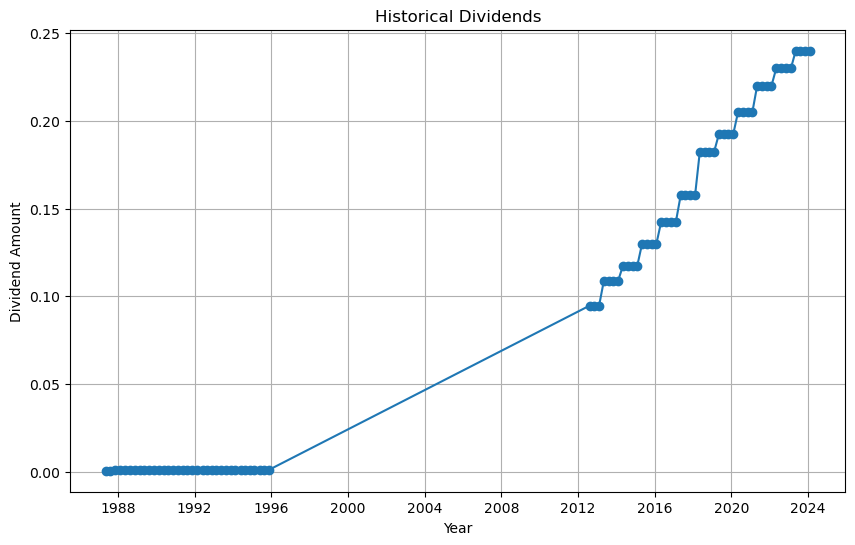

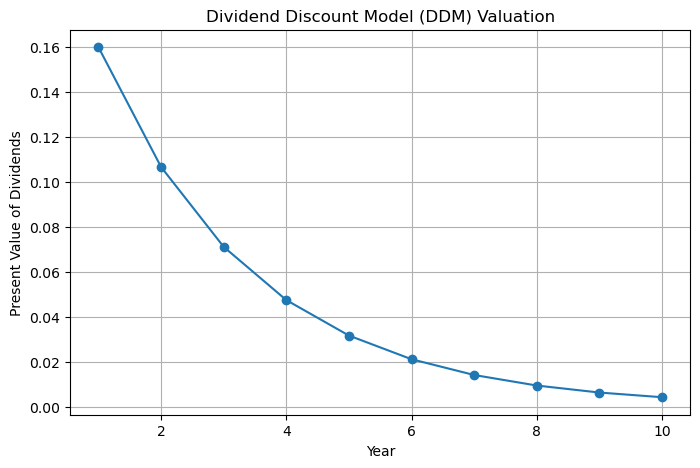

In [19]:
# Visualize historical dividends
plt.figure(figsize=(10, 6))
plt.plot(dividends.index, dividends, marker='o', linestyle='-')
plt.title('Historical Dividends')
plt.xlabel('Year')
plt.ylabel('Dividend Amount')
plt.grid(True)
plt.show()

# Visualize DDM valuation
plt.figure(figsize=(8, 5))
years = np.arange(1, 11)  # Assuming we are valuing for the next 10 years
discounted_dividends = [latest_dividend / ((1 + discount_rate) ** year) for year in years]
plt.plot(years, discounted_dividends, marker='o', linestyle='-')
plt.title('Dividend Discount Model (DDM) Valuation')
plt.xlabel('Year')
plt.ylabel('Present Value of Dividends')
plt.grid(True)
plt.show()

# Calcul Dividend Discount Model With Wealth Managment 

In [16]:
def ddm_with_initial_investment(stock_symbol, initial_investment, discount_rate):
    # Fetch historical dividend data using yfinance
    stock = yf.Ticker(stock_symbol)
    dividends = stock.dividends
    
    # Calculate the present value of dividends
    total_pv = -initial_investment  # Initial investment is considered as a negative cash outflow
    for i, dividend in enumerate(dividends):
        year = i + 1
        discounted_dividend = dividend / (1 + discount_rate) ** year
        total_pv += discounted_dividend
    
    return total_pv


In [17]:
# Example parameters
stock_symbol = 'AAPL'  # Apple Inc. stock symbol
initial_investment = 1000  # Initial investment amount
discount_rate = 0.50 # Discount rate (10%)

In [18]:
# Calculate the present value of dividends with initial investment
ddm_value = ddm_with_initial_investment(stock_symbol, initial_investment, discount_rate)

print("Present value of dividends with initial investment:", ddm_value)

Present value of dividends with initial investment: -999.998734516617
